In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text 
from mplsoccer import Bumpy
import numpy as np

from PIL import Image
from io import BytesIO
import requests

In [7]:
df = pd.read_csv('/Users/kiramaya/Downloads/la_liga_standings.csv')


In [8]:
df

,Rank,Team,Points,Expected Points
0,1,Barcelona,60,59.95
1,2,Real Madrid,60,54.28
2,3,Atletico Madrid,56,50.06
3,4,Athletic Club,52,49.07
4,5,Villarreal,44,50.53
5,6,Real Betis,44,47.25
6,7,Mallorca,40,41.17
7,8,Celta Vigo,39,43.49
8,9,Rayo Vallecano,37,37.97
9,10,Getafe,36,32.41


In [19]:
df['xPTS_Diff'] = df['Points'] - df['Expected Points']
df = df.sort_values(by='xPTS_Diff', ascending=True)

In [20]:

xpts = df['Expected Points']
points = df['Points']
teams = df['Team']

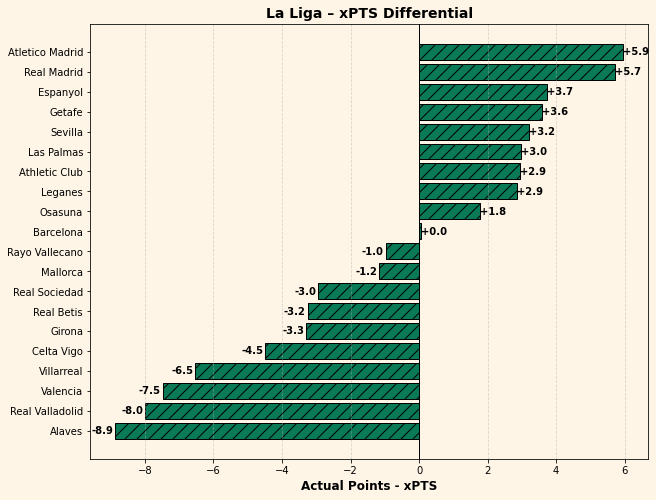

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(df['Team'], df['xPTS_Diff'], color='#0A7A56', edgecolor='black', hatch='//')


for bar, diff in zip(bars, df['xPTS_Diff']):
    if diff < 0:
        ax.text(bar.get_width() - 0.7, bar.get_y() + bar.get_height()/2, f'{diff:+.1f}', 
                va='center', ha='left', fontsize=10, fontweight='bold', color='black')  
    else:
        ax.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{diff:+.1f}', 
                va='center', ha='left', fontsize=10, fontweight='bold')  

ax.set_facecolor('#FEF5E7')#Background color
fig.set_facecolor('#FEF5E7')
plt.xlabel('Actual Points - xPTS', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.title('La Liga – xPTS Differential', fontsize=14, fontweight='bold')


ax.axvline(0, color='black', linewidth=1)#Vertical line at zero
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [41]:
fig.savefig('/Users/kiramaya/Downloads/la_liga_standings.png', dpi=300,bbox_inches='tight')